In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,287 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
import json
import pandas as pd     #provides wide variety tools for data analysis,many inbuilt methods for grouping, combining and filtering data.
import numpy as np      #for some basic mathematical operations
from matplotlib import pyplot as plt #comprehensive library for creating static, animated, and interactive visualizations
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  LabelEncoder
import seaborn as sns                #  high-level interface for drawing attractive and informative statistical graphics
import folium
from folium import plugins
import missingno as mnso
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

구글 드라이브에서 끌어오는 것에서 read_csv로 바꿈.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def datainfo(data):
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

**추가한 코드**

대여소정보_이용정보(시간대별).csv 와 SURFACE_ASOS_108_HR_2021_2021_2022_1.csv 머지한 코드 (결과물은 seodaemunAndmapo.csv와 같음.)

In [ ]:
df = pd.read_csv("대여소정보_이용정보(시간대별).csv")

In [ ]:
df.head()

,대여일자,대여시간,대여소번호,이용건수,이동거리,사용시간,월,일,요일,소재지(위치)
0,2021-01-01 00:00:00,0,192,1.0,908.98,7.0,1,1,4,서대문구
1,2021-01-01 00:00:00,13,192,1.0,460.03,11.0,1,1,4,서대문구
2,2021-01-01 00:00:00,13,192,1.0,0.00,25.0,1,1,4,서대문구
3,2021-01-01 00:00:00,15,192,1.0,0.00,5.0,1,1,4,서대문구
4,2021-01-01 00:00:00,18,192,1.0,0.00,125.0,1,1,4,서대문구


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972800 entries, 0 to 972799
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     972800 non-null  object 
 1   대여시간     972800 non-null  int64  
 2   대여소번호    972800 non-null  int64  
 3   이용건수     972800 non-null  float64
 4   이동거리     972799 non-null  float64
 5   사용시간     972799 non-null  float64
 6   월        972800 non-null  int64  
 7   일        972800 non-null  int64  
 8   요일       972800 non-null  int64  
 9   소재지(위치)  972800 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 74.2+ MB


In [ ]:
weather = pd.read_csv("SURFACE_ASOS_108_HR_2021_2021_2022_1.csv")

In [ ]:
weather.head()

,지점,일시,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,108,2021-01-01 0:00,-8.3,NaN,1.8,66
1,108,2021-01-01 1:00,-8.7,NaN,2.4,68
2,108,2021-01-01 2:00,-9.1,NaN,1.6,69
3,108,2021-01-01 3:00,-9.3,NaN,1.1,70
4,108,2021-01-01 4:00,-9.3,NaN,0.3,71


In [ ]:
weather['일시'] = weather['일시'].astype('datetime64[ns]')
weather['월'] = weather['일시'].dt.month
weather['일'] = weather['일시'].dt.day
weather['대여시간'] = weather['일시'].dt.hour

In [ ]:
weather = weather.fillna(0.0)

In [ ]:
weather.drop(columns=['지점'], inplace=True)
weather.drop(columns=['일시'], inplace=True)

In [ ]:
weather.head()

,기온(°C),강수량(mm),풍속(m/s),습도(%),월,일,대여시간
0,-8.3,0.0,1.8,66,1,1,0
1,-8.7,0.0,2.4,68,1,1,1
2,-9.1,0.0,1.6,69,1,1,2
3,-9.3,0.0,1.1,70,1,1,3
4,-9.3,0.0,0.3,71,1,1,4


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   기온(°C)   8760 non-null   float64
 1   강수량(mm)  8760 non-null   float64
 2   풍속(m/s)  8760 non-null   float64
 3   습도(%)    8760 non-null   int64  
 4   월        8760 non-null   int64  
 5   일        8760 non-null   int64  
 6   대여시간     8760 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 479.2 KB


In [ ]:
df = df.merge(weather, on = ['월', '일', '대여시간']) #날씨 데이터와 merge

In [ ]:
df.head()

,대여일자,대여시간,대여소번호,이용건수,이동거리,사용시간,월,일,요일,소재지(위치),기온(°C),강수량(mm),풍속(m/s),습도(%)
0,2021-01-01 00:00:00,0,192,1.0,908.98,7.0,1,1,4,서대문구,-8.3,0.0,1.8,66
1,2021-01-01 00:00:00,0,3115,1.0,8216.11,31.0,1,1,4,서대문구,-8.3,0.0,1.8,66
2,2021-01-01 00:00:00,0,102,1.0,0.00,6.0,1,1,4,마포구,-8.3,0.0,1.8,66
3,2021-01-01 00:00:00,0,103,1.0,8813.25,49.0,1,1,4,마포구,-8.3,0.0,1.8,66
4,2021-01-01 00:00:00,0,108,1.0,1435.76,7.0,1,1,4,마포구,-8.3,0.0,1.8,66


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972800 entries, 0 to 972799
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     972800 non-null  object 
 1   대여시간     972800 non-null  int64  
 2   대여소번호    972800 non-null  int64  
 3   이용건수     972800 non-null  float64
 4   이동거리     972799 non-null  float64
 5   사용시간     972799 non-null  float64
 6   월        972800 non-null  int64  
 7   일        972800 non-null  int64  
 8   요일       972800 non-null  int64  
 9   소재지(위치)  972800 non-null  object 
 10  기온(°C)   972800 non-null  float64
 11  강수량(mm)  972800 non-null  float64
 12  풍속(m/s)  972800 non-null  float64
 13  습도(%)    972800 non-null  int64  
dtypes: float64(6), int64(6), object(2)
memory usage: 111.3+ MB


In [ ]:
datainfo(df)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
대여일자,object,972800,201,0,0.000000
대여시간,int64,972800,24,0,0.000000
대여소번호,int64,972800,190,0,0.000000
이용건수,float64,972800,14,0,0.000000
이동거리,float64,972799,366289,1,0.000103
사용시간,float64,972799,593,1,0.000103
월,int64,972800,12,0,0.000000
일,int64,972800,31,0,0.000000
요일,int64,972800,7,0,0.000000
소재지(위치),object,972800,2,0,0.000000


원래 코드: seodaemunAndmapo.csv 불러오는 코드

In [21]:
seodaemunAndmapo = pd.read_csv('seodaemunAndmapo.csv')

In [22]:
datainfo(seodaemunAndmapo)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
대여일자,object,972800,201,0,0.000000
대여시간,int64,972800,24,0,0.000000
대여소번호,int64,972800,190,0,0.000000
이용건수,float64,972800,14,0,0.000000
이동거리,float64,972799,366289,1,0.000103
사용시간,float64,972799,593,1,0.000103
월,int64,972800,12,0,0.000000
일,int64,972800,31,0,0.000000
요일,int64,972800,7,0,0.000000
기온(°C),float64,972800,491,0,0.000000


In [23]:
seodaemunAndmapo.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972800 entries, 0 to 972799
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     972800 non-null  object 
 1   대여시간     972800 non-null  int64  
 2   대여소번호    972800 non-null  int64  
 3   이용건수     972800 non-null  float64
 4   이동거리     972799 non-null  float64
 5   사용시간     972799 non-null  float64
 6   월        972800 non-null  int64  
 7   일        972800 non-null  int64  
 8   요일       972800 non-null  int64  
 9   기온(°C)   972800 non-null  float64
 10  강수량(mm)  972800 non-null  float64
 11  풍속(m/s)  972800 non-null  float64
 12  습도(%)    972800 non-null  int64  
 13  소재지(위치)  972800 non-null  object 
dtypes: float64(6), int64(6), object(2)
memory usage: 103.9+ MB


In [24]:
seodaemunAndmapo.head()

,대여일자,대여시간,대여소번호,이용건수,이동거리,사용시간,월,일,요일,기온(°C),강수량(mm),풍속(m/s),습도(%),소재지(위치)
0,2021-01-01 00:00:00,0,192,1.0,908.98,7.0,1,1,4,-8.3,0.0,1.8,66,서대문구
1,2021-01-01 00:00:00,13,192,1.0,460.03,11.0,1,1,4,-0.2,0.0,3.0,56,서대문구
2,2021-01-01 00:00:00,13,192,1.0,0.00,25.0,1,1,4,-0.2,0.0,3.0,56,서대문구
3,2021-01-01 00:00:00,15,192,1.0,0.00,5.0,1,1,4,1.2,0.0,2.6,52,서대문구
4,2021-01-01 00:00:00,18,192,1.0,0.00,125.0,1,1,4,-1.4,0.0,2.1,68,서대문구


In [7]:
seodaemunAndmapo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69274 entries, 0 to 69273
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   대여일자     69274 non-null  object 
 1   대여시간     69274 non-null  int64  
 2   대여소번호    69274 non-null  int64  
 3   이용건수     69274 non-null  float64
 4   이동거리     69274 non-null  float64
 5   사용시간     69273 non-null  float64
 6   월        69273 non-null  float64
 7   일        69273 non-null  float64
 8   요일       69273 non-null  float64
 9   기온(°C)   69273 non-null  float64
 10  강수량(mm)  69273 non-null  float64
 11  풍속(m/s)  69273 non-null  float64
 12  습도(%)    69273 non-null  float64
 13  소재지(위치)  69273 non-null  object 
dtypes: float64(10), int64(2), object(2)
memory usage: 7.4+ MB


In [25]:
seodaemunAndmapo.drop(columns=['대여일자'], inplace=True)
seodaemunAndmapo.drop(columns=['대여소번호'], inplace=True)
seodaemunAndmapo.drop(columns=['이동거리'], inplace=True)
seodaemunAndmapo.drop(columns=['사용시간'], inplace=True)

In [9]:
seodaemunAndmapo.head()

,대여시간,이용건수,월,일,요일,기온(°C),강수량(mm),풍속(m/s),습도(%),소재지(위치)
0,0,1.0,1.0,1.0,4.0,-8.3,0.0,1.8,66.0,서대문구
1,13,1.0,1.0,1.0,4.0,-0.2,0.0,3.0,56.0,서대문구
2,13,1.0,1.0,1.0,4.0,-0.2,0.0,3.0,56.0,서대문구
3,15,1.0,1.0,1.0,4.0,1.2,0.0,2.6,52.0,서대문구
4,18,1.0,1.0,1.0,4.0,-1.4,0.0,2.1,68.0,서대문구


혹시 필요할까봐.. 이동거리, 사용시간 평균 내는 코드

In [ ]:
#cols = ['소재지(위치)', '월', '일', '대여시간', '요일', '기온(°C)', '풍속(m/s)', '강수량(mm)', '습도(%)']
#seodaemunAndmapo = seodaemunAndmapo.groupby(cols)['이동거리', '사용시간', '이용건수'].agg({
#    "이동거리": 'mean',
#    '사용시간': 'mean',
#    "이용건수": 'sum'
#}).reset_index()

In [ ]:
#seodaemunAndmapo.head()

,소재지(위치),월,일,대여시간,요일,기온(°C),풍속(m/s),강수량(mm),습도(%),이동거리,사용시간,이용건수
0,마포구,1,1,0,4,-8.3,1.8,0.0,66,3117.614211,35.789474,20.0
1,마포구,1,1,1,4,-8.7,2.4,0.0,68,1359.411053,15.052632,19.0
2,마포구,1,1,2,4,-9.1,1.6,0.0,69,1634.458125,26.125000,17.0
3,마포구,1,1,3,4,-9.3,1.1,0.0,70,814.991818,16.727273,11.0
4,마포구,1,1,4,4,-9.3,0.3,0.0,71,998.001667,21.500000,6.0


In [ ]:
#datainfo(seodaemunAndmapo)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
소재지(위치),object,9401,2,0,0.0
월,int64,9401,12,0,0.0
일,int64,9401,31,0,0.0
대여시간,int64,9401,24,0,0.0
요일,int64,9401,7,0,0.0
기온(°C),float64,9401,491,0,0.0
풍속(m/s),float64,9401,75,0,0.0
강수량(mm),float64,9401,64,0,0.0
습도(%),int64,9401,82,0,0.0
이동거리,float64,9401,9396,0,0.0


In [26]:
cols = ['소재지(위치)', '월', '일', '대여시간', '요일', '기온(°C)', '풍속(m/s)', '강수량(mm)', '습도(%)']
seodaemunAndmapo = seodaemunAndmapo.groupby(cols)['이용건수'].agg(이용건수='sum').reset_index()
seodaemunAndmapo.head()

,소재지(위치),월,일,대여시간,요일,기온(°C),풍속(m/s),강수량(mm),습도(%),이용건수
0,마포구,1,1,0,4,-8.3,1.8,0.0,66,20.0
1,마포구,1,1,1,4,-8.7,2.4,0.0,68,19.0
2,마포구,1,1,2,4,-9.1,1.6,0.0,69,17.0
3,마포구,1,1,3,4,-9.3,1.1,0.0,70,11.0
4,마포구,1,1,4,4,-9.3,0.3,0.0,71,6.0


In [27]:
datainfo(seodaemunAndmapo)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
소재지(위치),object,9401,2,0,0.0
월,int64,9401,12,0,0.0
일,int64,9401,31,0,0.0
대여시간,int64,9401,24,0,0.0
요일,int64,9401,7,0,0.0
기온(°C),float64,9401,491,0,0.0
풍속(m/s),float64,9401,75,0,0.0
강수량(mm),float64,9401,64,0,0.0
습도(%),int64,9401,82,0,0.0
이용건수,float64,9401,655,0,0.0


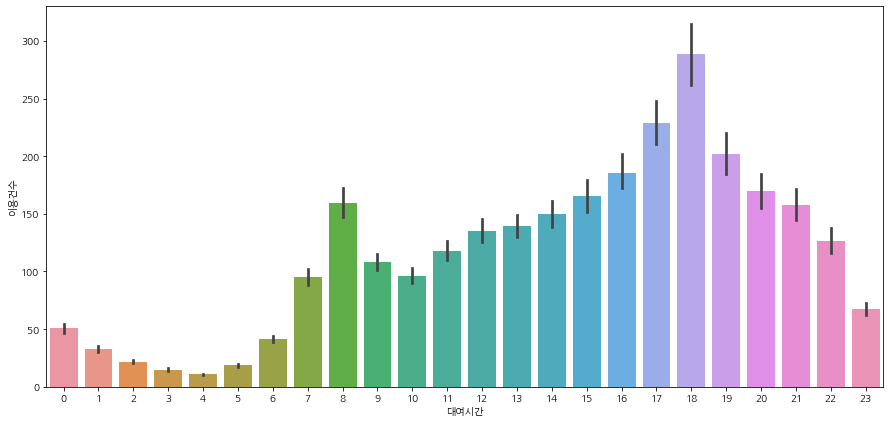

In [28]:
def barplots(x,y):
    plt.figure(figsize=(15,7))
    sns.set_palette("husl")
    sns.barplot(x=x,y=y,data=seodaemunAndmapo);
barplots('대여시간','이용건수') #역시 출근시간:8시, 퇴근시간:18시정도에 이용건수가 증가함.

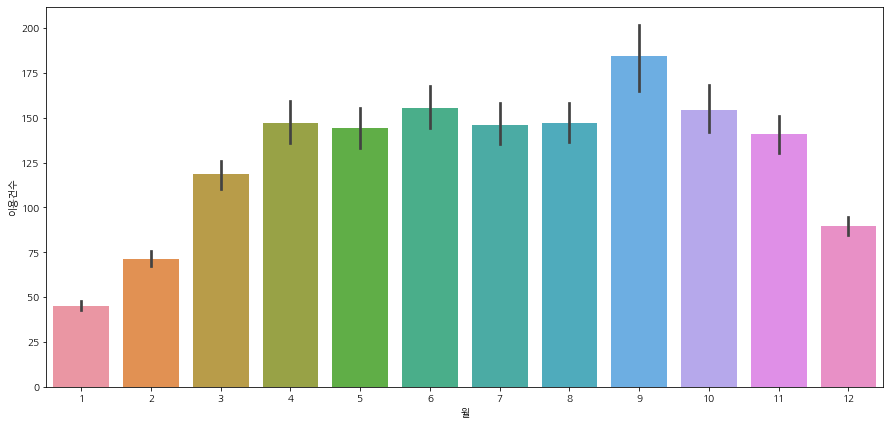

In [29]:
barplots('월', '이용건수') #겨울에 낮음

Text(0.5, 1.0, 'cube root')

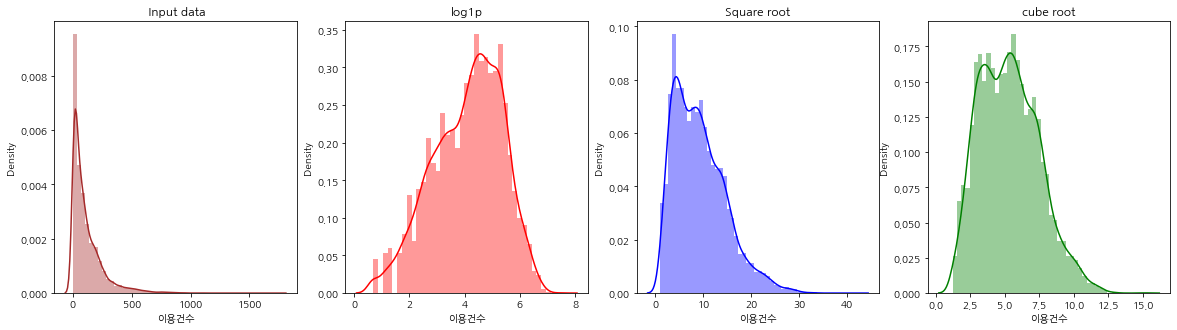

In [ ]:
#apply diffrent tranformation technique and checking data distributation
fig,axes = plt.subplots(1,4,figsize=(20,5))
sns.distplot((seodaemunAndmapo['이용건수']),ax=axes[0],color='brown').set_title(" Input data")
sns.distplot(np.log1p(seodaemunAndmapo['이용건수']+0.0000001),ax=axes[1],color='red').set_title("log1p") #transform only posible in positive value and >0 value so add 0.0000001 in data #로그스케일 적용
sns.distplot(np.sqrt(seodaemunAndmapo['이용건수']),ax=axes[2], color='blue').set_title("Square root")
sns.distplot(np.cbrt(seodaemunAndmapo['이용건수']*2),ax=axes[3], color='green').set_title("cube root")

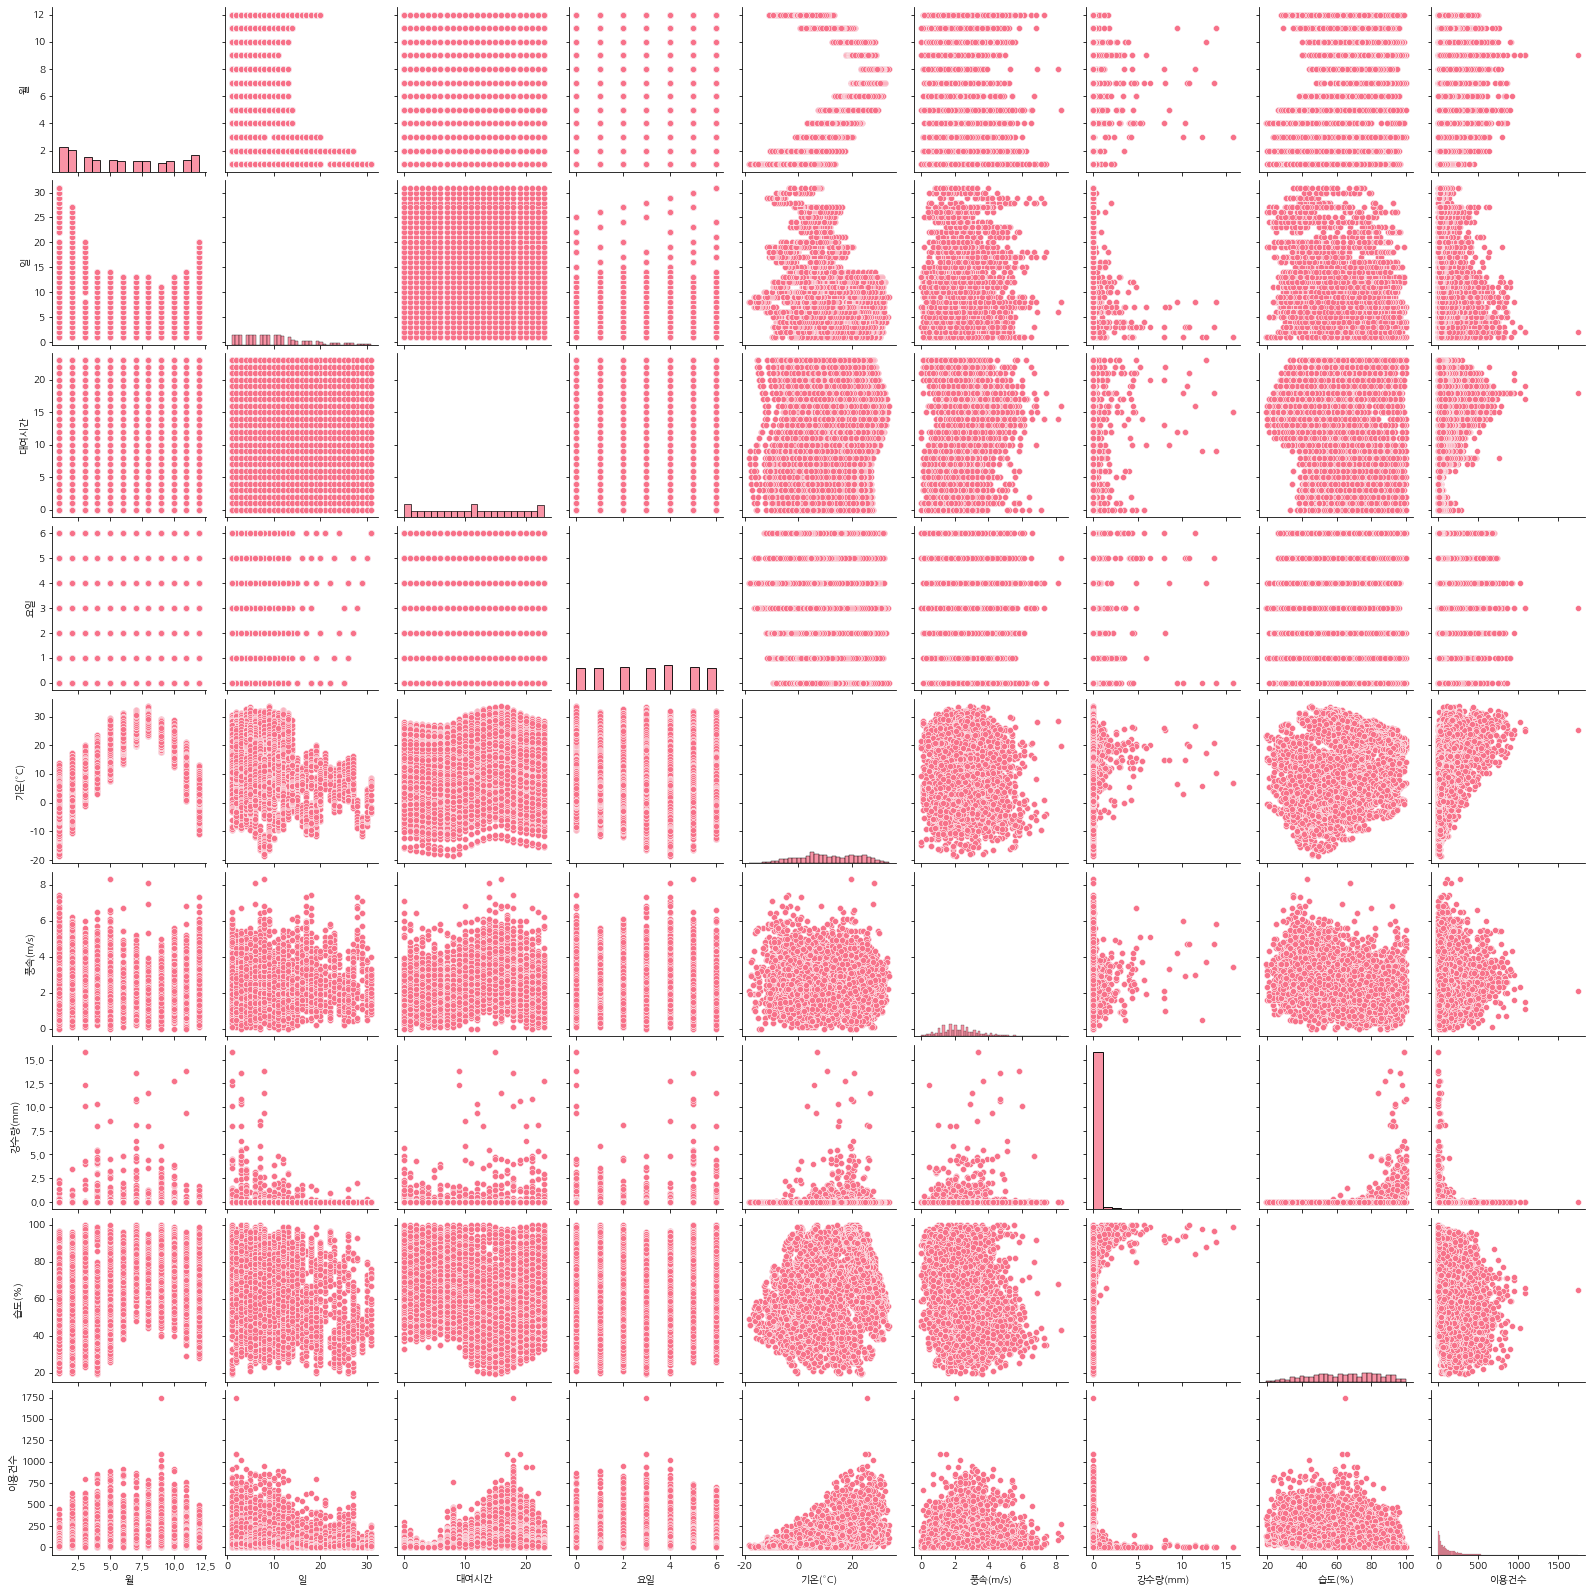

In [ ]:
sns.pairplot(seodaemunAndmapo)
plt.show()

In [ ]:
#StandarScaler적용
#std_scaler = StandardScaler()
#fitted = std_scaler.fit(seodaemunAndmapo)
## 출력 결과
## array([4.46000000e+02, 3.83838384e-01, 2.30864198e+00, 2.93615825e+01,
##        5.23007856e-01, 3.81593715e-01, 3.22042080e+01])
#output = std_scaler.transform(seodaemunAndmapo)
#output = pd.DataFrame(output, columns=seodaemunAndmapo.columns, index=list(seodaemunAndmapo.index.values))
#print(output.head())

In [ ]:
#apply diffrent tranformation technique and checking data distributation
#fig,axes = plt.subplots(1,4,figsize=(20,5))
#sns.distplot((output['이용건수']),ax=axes[0],color='brown').set_title(" Input data")
#sns.distplot(np.log1p(output['이용건수']+0.0000001),ax=axes[1],color='red').set_title("log1p") #transform only posible in positive value and >0 value so add 0.0000001 in data
#sns.distplot(np.sqrt(output['이용건수']),ax=axes[2], color='blue').set_title("Square root")
#sns.distplot(np.cbrt(output['이용건수']*2),ax=axes[3], color='green').set_title("cube root")

In [31]:
seodaemunAndmapo.drop(columns=['소재지(위치)'], inplace=True)

In [33]:
#로그스케일적용
log_df = np.log1p(seodaemunAndmapo)

Text(0.5, 1.0, ' Input data')

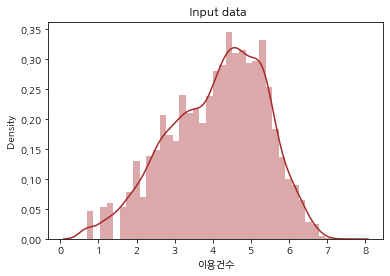

In [34]:
sns.distplot((log_df['이용건수']),color='brown').set_title(" Input data")